# Яковлев Д.С ИУ5-21М
## Рубежный контроль 1
### Вариант 14
### Задание: Задача №2.
#### Для заданного набора данных проведите обработку пропусков в данных.
#### Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? 
Для заполнения пропусков в количественных данных была произведена импутация средних (mean) значений по признаку при помощи классса SimpleImputer библиотеки sklearn.impute.
Для заполнения пропусков в категориальных данных была произведена импутация наиболее часто встречающихся значений при помощи классса SimpleImputer библиотеки sklearn.impute, а также преобразование в количественные признаки при помощи классса LabelEncoder библиотеки sklearn.preprocessing.
#### Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?
В дальнейшем планируется использовать признаки Mag и Stations.
Используемые признаки показывают когда и сколько станций зарегестрировало землетрясения, по ним можно предстказывать, когда будет очередное.
#### Для заданного набора данных произведите масштабирование данных и преобразование категориальных признаков в количественные. 
#### Какие методы Вы использовали для решения задачи и почему?
Было произведено 3 варианта масштабирования - MinMax, Z - ценка и нормализация при помощи классов MinMaxScaler, StandardScaler, Normalizer библиотеки sklearn.preprocessing. 
В результате нормализации все значения были приведены к 1 или к 0, в связи с чем данный вид нормализации перестал отображать какие-либо зависимости, в отличие от методов MinMaxScaler, StandardScaler, которые дали похожие результаты, отличающиеся диапазоном.
#### Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

### Загрузка набора данных

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline 
sns.set(style="ticks")

In [41]:
data = pd.read_csv('data.csv',";")

In [42]:
data.shape

(1000, 6)

In [43]:
data.dtypes

num           int64
lat         float64
long        float64
depth       float64
mag          object
stations      int64
dtype: object

##### Кол-во пустых значений в колонках

In [44]:
data.isnull().sum()

num          0
lat          0
long        12
depth        6
mag          0
stations     0
dtype: int64

In [45]:
data.head()

,num,lat,long,depth,mag,stations
0,1,-20.42,181.62,562.0,04.Aug,41
1,2,-20.62,181.03,650.0,04.Feb,15
2,3,-26.00,184.10,42.0,05.Apr,43
3,4,-17.97,181.66,626.0,04.Jan,19
4,5,-20.42,181.96,649.0,4,11


In [46]:
total_count = data.shape[0]
print('Строки в наборе : {}'.format(total_count))

Строки в наборе : 1000


## Обработка пропусков
##### Удаление колонок, содержащих пустые значения

In [47]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1000, 6), (1000, 4))

##### Удаление строк, содержащих пустые значения

In [48]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1000, 6), (982, 6))

Видим, что при удалении колонок с пустыми значениями удаляется слишком много колонок, а при удалении строк с пропусками удаляются вообще все строки. Сделаем вывод, что эти методы не подходят

##### Заполнение всех пропущенных значений нулями

In [49]:
data_new_3 = data.fillna(0)
data_new_3.head()

,num,lat,long,depth,mag,stations
0,1,-20.42,181.62,562.0,04.Aug,41
1,2,-20.62,181.03,650.0,04.Feb,15
2,3,-26.00,184.10,42.0,05.Apr,43
3,4,-17.97,181.66,626.0,04.Jan,19
4,5,-20.42,181.96,649.0,4,11


## Импьютация

### Числовые данные

##### Выберем числовые колонки с пропущенными значениями

In [50]:
num_cols = []
def print_nones_num():
    print('Колонка -  Тип данных - Количество пустых значений')
    for col in data.columns:
        # Количество пустых значений 
        temp_null_count = data[data[col].isnull()].shape[0]
        dt = str(data[col].dtype)
        if temp_null_count>0 and (dt=='float64' or dt=='int64'):
            num_cols.append(col)
            temp_perc = round((temp_null_count / total_count) * 100.0, 2)
            print('{} - {} - {}'.format(col,
                                        dt,  
                                        temp_null_count,
                                        temp_perc))

In [51]:
print_nones_num()

Колонка -  Тип данных - Количество пустых значений
long - float64 - 12
depth - float64 - 6


##### Фильтр по колонкам с пропущенными значениями

In [52]:
data_num = data[num_cols]
data_num

,long,depth
0,181.62,562.0
1,181.03,650.0
2,184.10,42.0
3,181.66,626.0
4,181.96,649.0
...,...,...
995,179.54,470.0
996,167.06,248.0
997,184.20,244.0
998,187.80,40.0


### Функция импутации, которая позволяет задавать колонку и вид импьютации

In [53]:
strategies=['mean', 'median','most_frequent']

In [54]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
   
    filled_data = data_num_imp[mask_missing_values_only]
    dataset[column] = data_num_imp
    
    return column, data_num_imp, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [55]:
for col in data_num:
    imp = test_num_impute_col(data, col, strategies[0])
    data[col] = imp[1]

#### Проверим, что не осталось числовых колонок с пустыми значениями

In [56]:
print_nones_num()

Колонка -  Тип данных - Количество пустых значений


## Обработка пропусков в категориальных данных

In [57]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
def print_nones_cat():
    print('Колонка - Тип данных - Количество пустых значений' )
    for col in data.columns:
        # Количество пустых значений 
        temp_null_count = data[data[col].isnull()].shape[0]
        dt = str(data[col].dtype)
        if temp_null_count>0 and (dt=='object'):
            cat_cols.append(col)
            temp_perc = round((temp_null_count / total_count) * 100.0, 2)
            print('{} - {} - {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

In [58]:
print_nones_cat()

Колонка - Тип данных - Количество пустых значений


In [59]:
cat_temp_data1 = []
for col in cat_cols:
    cat_temp_data1.append(data[[col]])
cat_temp_data1

[]

### Импьютация и  преобразование категориальных признаков в числовые

#### Импьютация наиболее частыми значениями

In [60]:
def cat_imp(strategy='most_frequent'):
    le = LabelEncoder()
    for col in cat_temp_data1:
        imp3 = SimpleImputer(missing_values=np.nan, strategy=strategy, fill_value='!!!!!')
        data_imp3 = imp3.fit_transform(col)
        cat_enc = pd.DataFrame({col.columns[0]:data_imp3.T[0]})
#         cat_enc_le = le.fit_transform(cat_enc[col.columns[0]])
        print(col.columns[0], ': ', cat_enc)
        data[col.columns[0]] = cat_enc


In [61]:
cat_imp()

In [62]:
def cat_to_num():
    le = LabelEncoder()
    for col in data.columns:
        dt = str(data[col].dtype)
        if (dt=='object'):
            cat_enc_le = le.fit_transform(data[col])
            print(col, ': ', cat_enc_le)
            data[col] = cat_enc_le


#### Преобразование категориальных в числовые значения

In [63]:
cat_to_num()

mag :  [ 1  2  9  3 19 19  1  0  4  6  0  5  0  0 18  6 21  7  0  0  7  2  0  4
  9 19  5 10  7  0  5  4  1 19  7  6  7  5  3  0  4  5  0  6  5  8  7  0
  6 11  2 19  5  6  2  0  7 19  0  6  4  3 20  5  8  4  3 20  7 15 19  7
  6 10  0  6  3  7  2 14 10  7  5  6 19  6  4  7  2  6 11  4 10  2  2 19
  7 10 11  4  3  5  4  4  5  2  0  5 12 20  7  2 19  1  0  2 14  4  1  2
  1  6  4  7  0 11  2 20  1  6  7  2  7  5  6  4 11  5  8  2  5 19 20  0
  2  2  0  8 14 19 12 17  6  2  4  4  2  6  8  5  3  1  5  5  1 20 13 14
  4  7  6  5  3  3  3 12 20  7  3  5  7  6  0  2  3  8  6  8  5  5 14  4
  5  3  5  2  5  7  6 10  6 19  4  7  7  6 10  7  4  2  4  6  3  9  6  6
  2  5  0  2  4  5  8  2  7  8  2  7 20 20  4  6  0  8  7 19  0 20  4  1
  7  3 14  1 20  5  6  4 14  2  4  7 11  8  0  2  5  4  2  8 11  4  0  0
  2  8  5  0  5  7  0  8  3  2 12  5 20  6  7 10  0  2  5 19  0  4  2  4
  7 20 20  1  5  5 20 20 13 19 19  5  0  1  4  5  6  4  3  8  5  1  8 11
  9  7  8  0  3 14  7  8  1 10  0  0  8  0  

In [64]:
data.head()

,num,lat,long,depth,mag,stations
0,1,-20.42,181.62,562.0,1,41
1,2,-20.62,181.03,650.0,2,15
2,3,-26.00,184.10,42.0,9,43
3,4,-17.97,181.66,626.0,3,19
4,5,-20.42,181.96,649.0,19,11


#### Проверим, что нет категориальных колонок с пропущенными значениями

In [65]:
print_nones_cat()

Колонка - Тип данных - Количество пустых значений


## Масштабирование данных

### MinMax

num


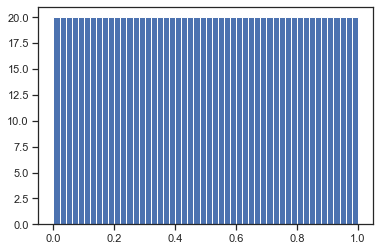

lat


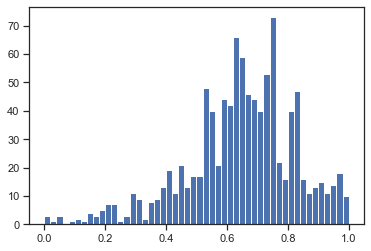

long


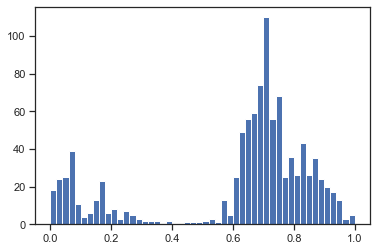

depth


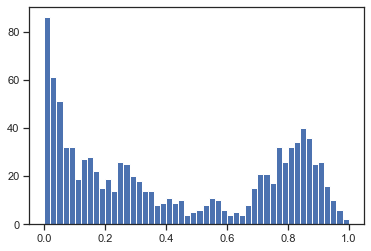

mag


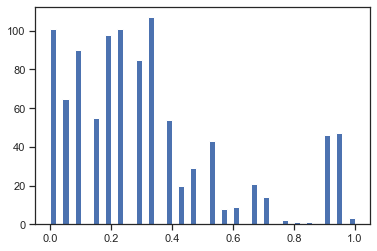

stations


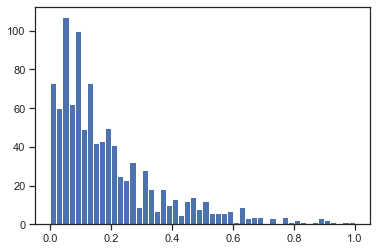

In [66]:
sc = MinMaxScaler()
for col in data.columns:
    sc_data = sc.fit_transform(data[[col]])
    print(col)
    plt.hist(sc_data, 50)
    plt.show()

### Z-оценка

num


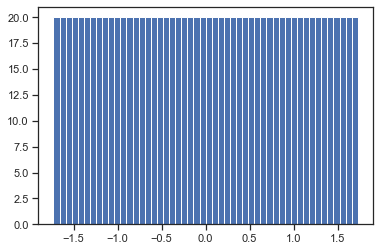

lat


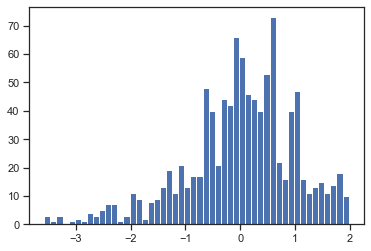

long


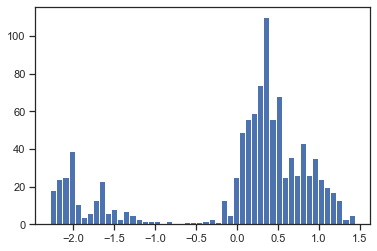

depth


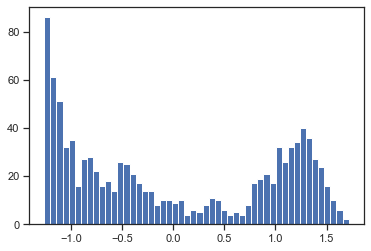

mag


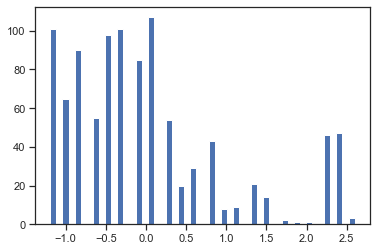

stations


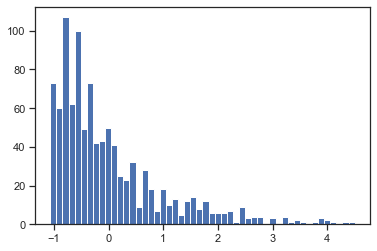

In [67]:
sc1 = StandardScaler()
for col in data.columns:
    sc1_data = sc1.fit_transform(data[[col]])
    print(col)
    plt.hist(sc1_data, 50)
    plt.show()

### Нормализация

num


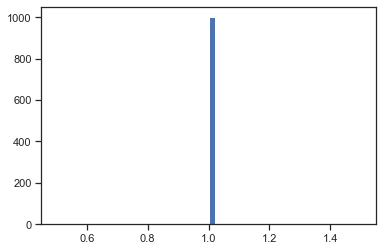

lat


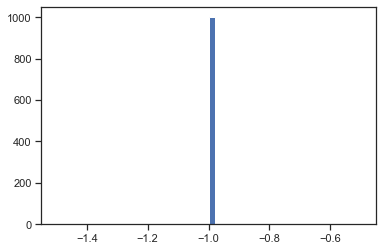

long


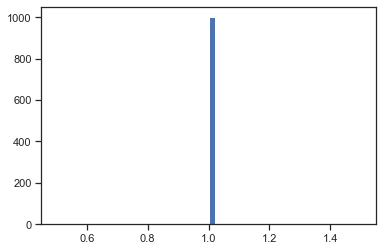

depth


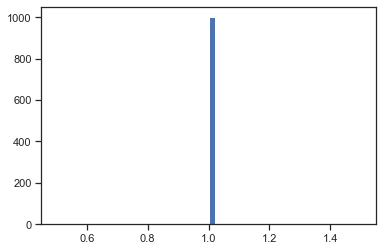

mag


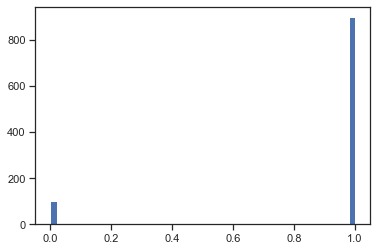

stations


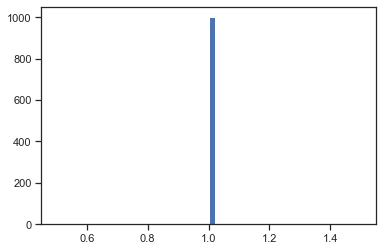

In [68]:
sc2 = Normalizer()
for col in data.columns:
    sc2_data = sc2.fit_transform(data[[col]])
    print(col)
    plt.hist(sc2_data, 50)
    plt.show()

### Диаграмма рассеяния

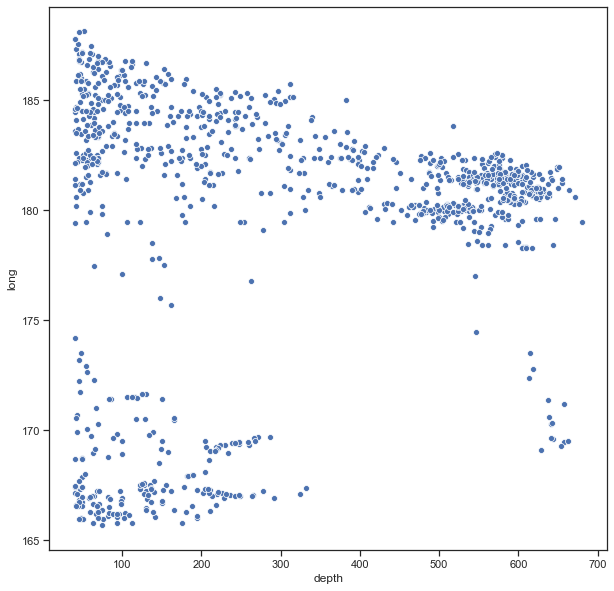

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='depth', y='long', data=data)

###### По данному графику видим, что от скорости реакции футболиста напрямую зависит его общий рейтинг

## Вывод:
    В процессе выполнения данной работы были изучены методы обработки пропусков в данных, кодирования категориальных признаков и масштабирования данных.